# <b>Student Wellbeing Performance Evaluation</b>

<b>Name</b>: Nancy Chemutai \
<b>ID</b>: CS-DA01-25016

<b>Background</b>
<p>In today’s highly competitive academic environment, the wellbeing of students has become a critical factor influencing their academic outcomes. With rising concerns around mental health, burnout, and disengagement (especially among students in demanding programs such as Data Science, Cybersecurity, Networking, Applications, and Artificial Intelligence) universities are seeking data-driven strategies to better support student success. This exam places you in the role of a junior data analyst working on a research project initiated by the university's Office of Academic Affairs.</p>

<b>Objectives</b>
<p>The core aim of the project is to explore “What are the patterns between student well-being and academic performance?”</p> 
<p>This guiding research question reflects a growing need to understand how various dimensions of student wellbeing—such as sleep, stress levels, mood, exercise, and social media usage—interact with academic indicators like GPA, study hours, and attendance. The insights generated from this analysis will be used to inform institutional policies, design student support services, and create early warning systems to identify at-risk students.</p>

<b>Dataset Information</b>
<p>The dataset consists of 300 student records drawn from five academic programs.</p> 
The dataset includes:
<ol>
    <li>demographic information (e.g., age, gender, program)</li>
    <li>indicators of wellbeing (e.g., study hours, sleep hours, exercise, mood, stress, and social media use) and </li>
    <li>academic performance data (e.g. attendance %, Grade %) </li>
</ol>

## <b>Importing Relevant Libraries</b>

In [160]:
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns

## <b>Data Loading</b>

In [161]:
df = pd.read_csv("../student_performance/student_wellbeing_final.csv")

# Show the first five rows 
df.head()

,StudentID,Name,Age,Gender,Program,GPA,StudyHours,SleepHours,ExerciseHours,SocialMediaHours,MoodLevel,StressLevel,AttendanceRate (%)
0,1001,Robert,24,M,Applications,2.73,10.0,6.0,6.0,5,10,6,92.80
1,1002,Jennifer,32,F,Applications,NaN,19.0,6.0,4.0,4,2,3,87.80
2,1003,Charles,28,M,Applications,2.89,1.0,9.0,0.0,5,9,9,81.30
3,1004,Robert,25,M,Applications,3.19,14.0,9.0,5.0,6,10,7,77.95
4,1005,Joseph,24,NaN,Data Science,2.28,13.0,8.0,4.0,1,5,1,NaN


In [162]:
df1 = df.copy()

In [163]:
# Check the shape
df1.shape

(300, 13)

In [164]:
# check for irregularities in the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           300 non-null    int64  
 1   Name                300 non-null    object 
 2   Age                 300 non-null    int64  
 3   Gender              266 non-null    object 
 4   Program             300 non-null    object 
 5   GPA                 276 non-null    float64
 6   StudyHours          276 non-null    float64
 7   SleepHours          276 non-null    float64
 8   ExerciseHours       276 non-null    float64
 9   SocialMediaHours    300 non-null    int64  
 10  MoodLevel           300 non-null    int64  
 11  StressLevel         300 non-null    int64  
 12  AttendanceRate (%)  276 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 30.6+ KB


- Presence of missing values in columns `Gender`, `GPA`, `StudyHours`, `SleepHours`, `ExerciseHours`, and `AttendanceRate`.

In [165]:
# Statistics for numerical columns
df1.describe()

,StudentID,Age,GPA,StudyHours,SleepHours,ExerciseHours,SocialMediaHours,MoodLevel,StressLevel,AttendanceRate (%)
count,300.000000,300.000000,276.000000,276.000000,276.000000,276.000000,300.000000,300.000000,300.000000,276.000000
mean,1150.500000,25.853333,2.996522,11.902174,5.942029,3.043478,3.680000,5.693333,5.366667,80.028877
std,86.746758,5.397121,0.575842,7.164650,2.035210,1.959108,2.354303,2.822382,2.824680,11.527556
min,1001.000000,18.000000,0.860000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,60.090000
25%,1075.750000,21.000000,2.660000,6.000000,4.000000,1.000000,2.000000,3.000000,3.000000,70.097500
50%,1150.500000,25.000000,3.030000,12.000000,6.000000,3.000000,4.000000,6.000000,5.000000,80.120000
75%,1225.250000,31.000000,3.410000,18.000000,8.000000,5.000000,6.000000,8.000000,8.000000,90.227500
max,1300.000000,35.000000,4.000000,24.000000,9.000000,6.000000,7.000000,10.000000,10.000000,99.990000


In [166]:
# Statistics for categorical columns
df1.describe(include='object')

,Name,Gender,Program
count,300,266,300
unique,20,2,5
top,Susan,M,Applications
freq,26,136,66


In [167]:
# Percentage of missing values in each column
round(df1.isnull().mean() * 100, 2)

StudentID              0.00
Name                   0.00
Age                    0.00
Gender                11.33
Program                0.00
GPA                    8.00
StudyHours             8.00
SleepHours             8.00
ExerciseHours          8.00
SocialMediaHours       0.00
MoodLevel              0.00
StressLevel            0.00
AttendanceRate (%)     8.00
dtype: float64

- `Gender` has the highest percentage (11.33%) of missing values, compared to the other columns with missing data accounting for 8%.

In [168]:
# Check the number of Gender categories
df1['Gender'].value_counts()

Gender
M    136
F    130
Name: count, dtype: int64

## Check for unique values in columns

In [169]:
df1['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [170]:
df1['Program'].unique()

array(['Applications', 'Data Science', 'Networking',
       'Artificial Intelligence', 'Cybersecurity'], dtype=object)

# <b>Impute missing values</b>

In [171]:
# Fill `Gender` null values with a placeholder `Unknown`
df1['Gender'] = df1['Gender'].fillna('Unknown')
df1['Gender'].isnull().sum()

0

In [172]:
# Impute multiple columns with their mean
columns_to_impute = ['GPA', 'StudyHours', 'SleepHours', 'ExerciseHours', 'AttendanceRate (%)']
df1[columns_to_impute] = df1[columns_to_impute].fillna(df1[columns_to_impute].mean())
# Check the columns after imputation
df1[columns_to_impute].isnull().sum()

GPA                   0
StudyHours            0
SleepHours            0
ExerciseHours         0
AttendanceRate (%)    0
dtype: int64

In [173]:
# Compute GradeCategory based on GPA
def compute_grade_category(gpa):
    if gpa >= 3.7:
        return 'A'
    elif gpa >= 2.7:
        return 'B'
    elif gpa >= 1.7:
        return 'C'
    elif gpa >= 0.7:
        return 'D'
    else:
        return 'F'
df1['GradeCategory'] = df1['GPA'].apply(compute_grade_category)

In [174]:
df1.tail()

,StudentID,Name,Age,Gender,Program,GPA,StudyHours,SleepHours,ExerciseHours,SocialMediaHours,MoodLevel,StressLevel,AttendanceRate (%),GradeCategory
295,1296,Emily,31,F,Cybersecurity,2.730000,11.0,3.0,5.0,3,8,5,67.44,B
296,1297,William,29,M,Applications,2.930000,4.0,5.0,5.0,7,5,2,82.08,B
297,1298,Robert,32,M,Cybersecurity,2.996522,16.0,6.0,6.0,2,5,6,76.63,B
298,1299,Sarah,19,F,Applications,3.050000,16.0,4.0,4.0,7,4,3,88.79,B
299,1300,Joseph,19,M,Data Science,3.700000,23.0,3.0,4.0,7,6,8,74.85,A


In [175]:
# Compute the `WellbeingScore` 

# Normalize each metric to a 0–1 scale
df1['SleepScore'] = round(df1['SleepHours'] / 9, 2)   # assume 9 is max healthy sleep
df1['ExerciseScore'] = round(df1['ExerciseHours'] / 7, 2)# assume 7 is max healthy sleep
df1['MoodScore'] = round(df1['MoodLevel'] / 10, 2)  # assume MoodLevel is from 0 to 10
df1['StressScore'] = round(1 - (df1['StressLevel'] / 10), 2)  # inverse
df1['SocialMediaScore'] = round(1 - (df1['SocialMediaHours'] / 8), 2)  # inverse
df1['StudyScore'] = round(df1['StudyHours'] / 20, 2)  # normalize for 20-hour study max

# Calculate the Wellbeing Score
df1['WellbeingScore'] = (
    0.2 * df1['SleepScore'] + 
    0.2 * df1['ExerciseScore'] + 
    0.2 * df1['MoodScore'] + 
    0.2 * df1['StressScore'] + 
    0.1 * df1['SocialMediaScore'] + 
    0.1 * df1['StudyScore'])    
# Normalize the Wellbeing Score to a 0–100 scale
df1['WellbeingScore'] = round(df1['WellbeingScore'] * 100, 2)

In [176]:
df1 = df1.drop(columns=['StudentID', 'Name'])

### <b>Encode categorical data</b>

In [177]:
# Convert Gender to numerical values by allocating 1 to Male, 2 female, 3 Unknown
# gender_mapping = {'Male': 1, 'Female': 2, 'Unknown': 3}
# df1['Gender'] = df1['Gender'].map(gender_mapping)
# df1

## <b>Exploratory Data Analysis</b>

### <b>1. Univariate Analysis</b>

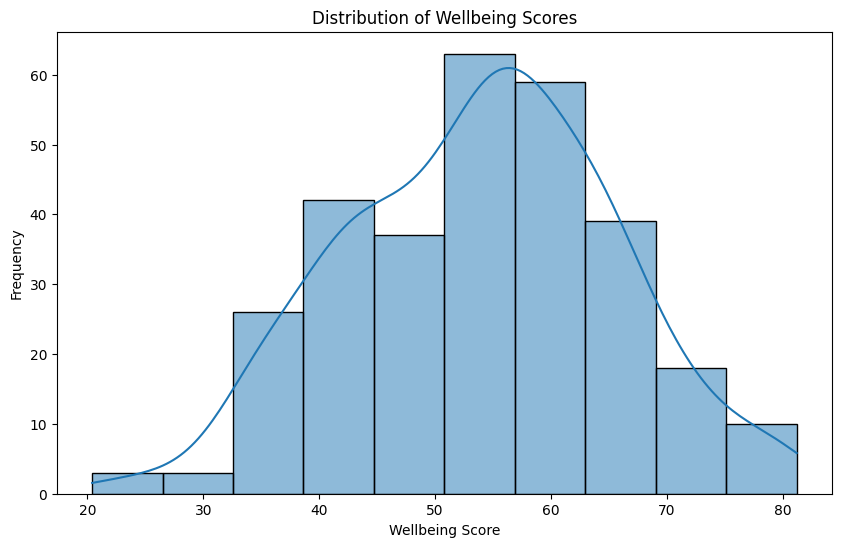

In [178]:
# Visualize the distribution of Wellbeing Scores
plt.figure(figsize=(10, 6))
sns.histplot(df1['WellbeingScore'], bins=10, kde=True)
plt.title('Distribution of Wellbeing Scores')
plt.xlabel('Wellbeing Score')
plt.ylabel('Frequency')
plt.show();



In [179]:
# Percentage of gender distribution
# df['Gender'].value_counts(normalize=True) * 100

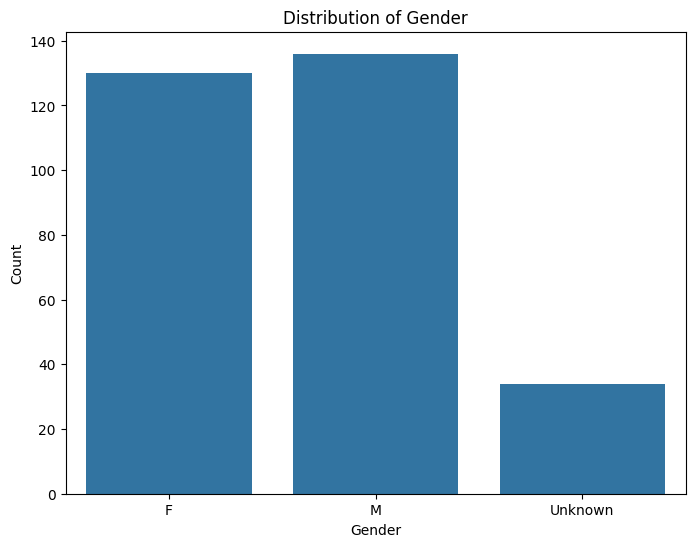

In [180]:
# Visualize gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Gender', order=sorted(df1['Gender'].unique()))
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

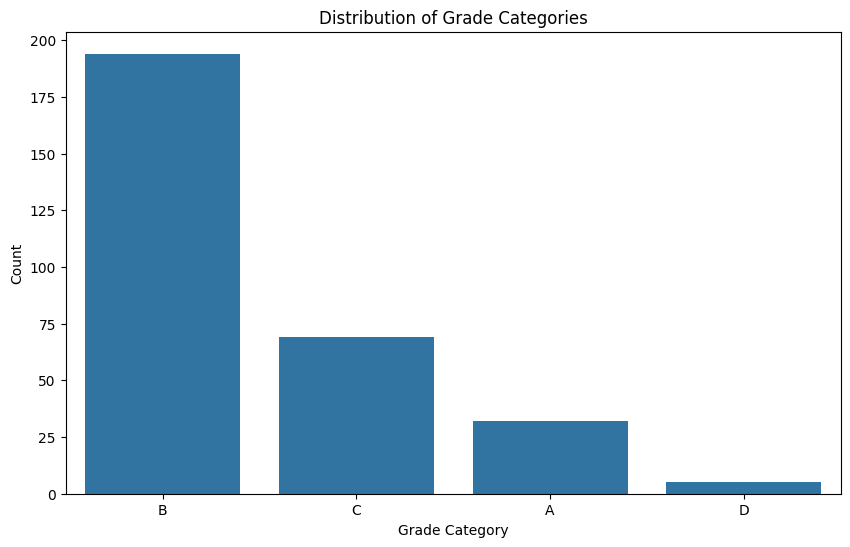

In [181]:
# Visualize the distribution of grade
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='GradeCategory', order=df1['GradeCategory'].value_counts().index)
plt.title('Distribution of Grade Categories')  
plt.xlabel('Grade Category')
plt.ylabel('Count')
plt.show();

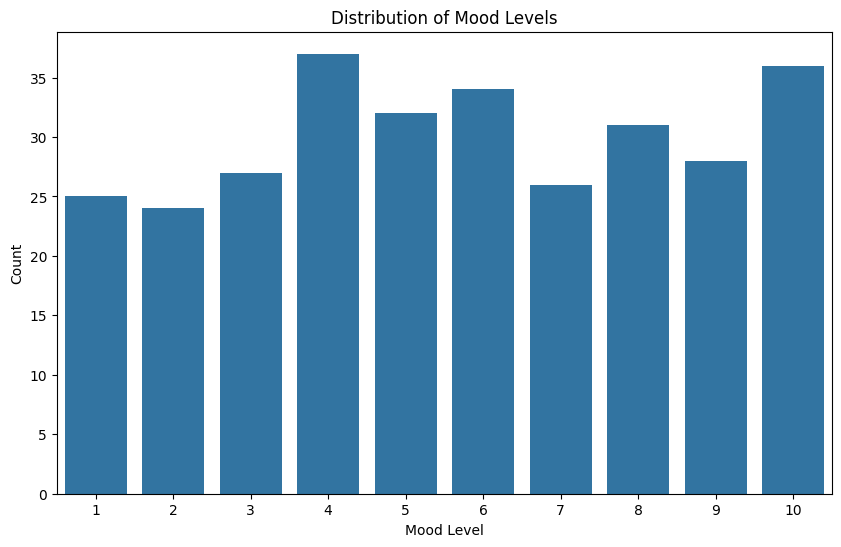

In [182]:
# Visualize mood level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='MoodLevel', order=sorted(df1['MoodLevel'].unique()))
plt.title('Distribution of Mood Levels')
plt.xlabel('Mood Level')
plt.ylabel('Count')
plt.show();

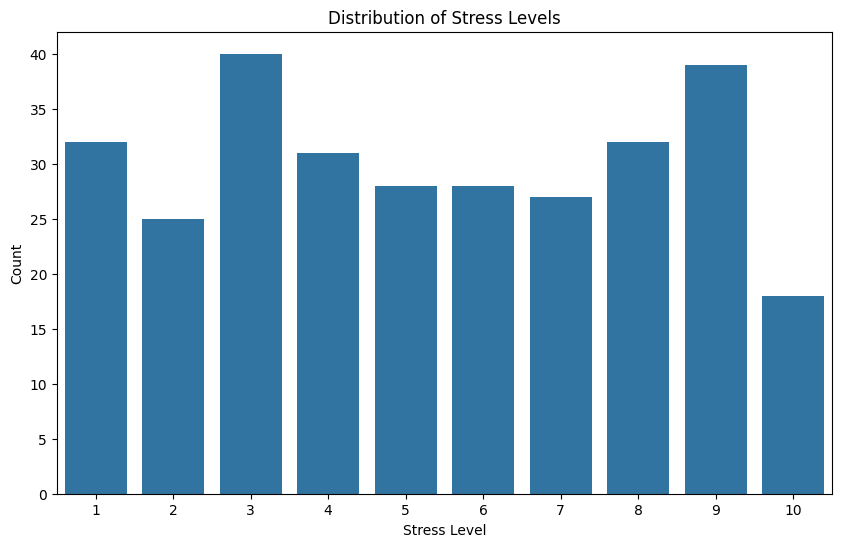

In [183]:
# Visualize stress level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='StressLevel', order=sorted(df1['StressLevel'].unique()))
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show();

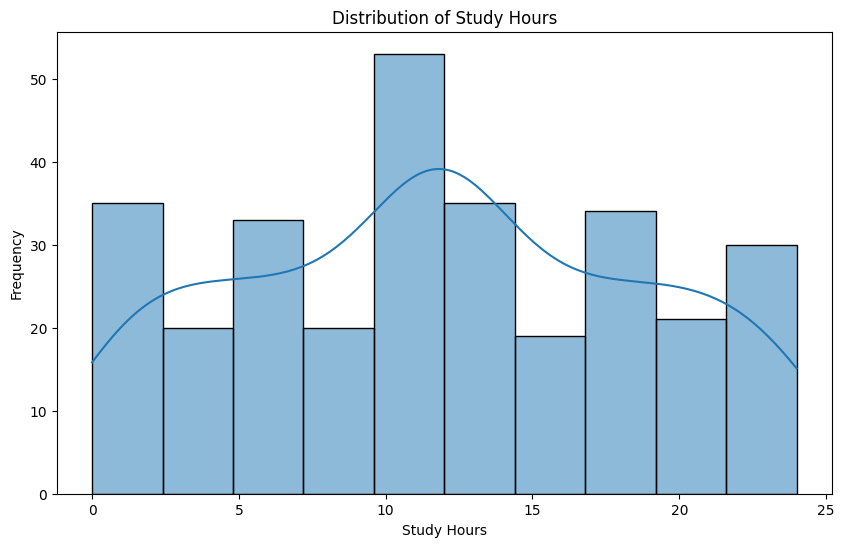

In [184]:
# Visualize study hours distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['StudyHours'], bins=10, kde=True)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show();

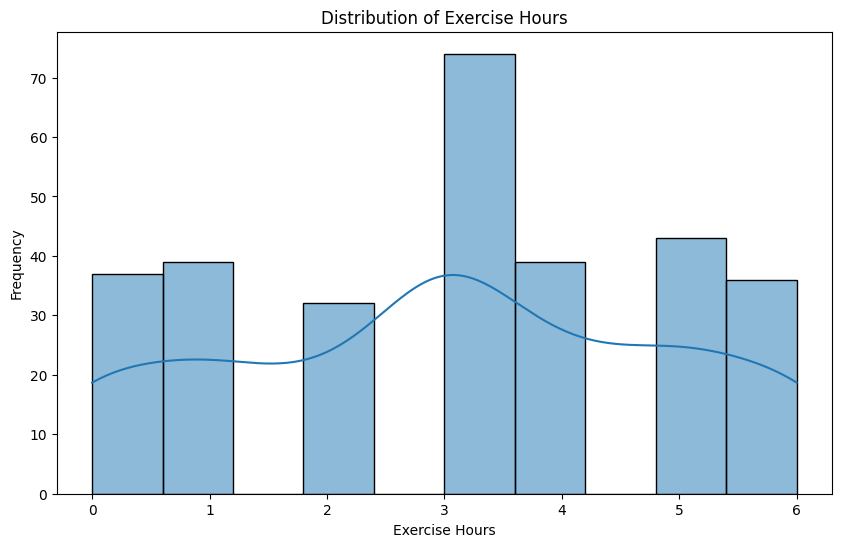

In [185]:
# Visualize exercise hours
plt.figure(figsize=(10, 6))
sns.histplot(df1['ExerciseHours'], bins=10, kde=True)
plt.title('Distribution of Exercise Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Frequency')
plt.show();

### <b>2. Bivariate/Multivariate Analysis</b>

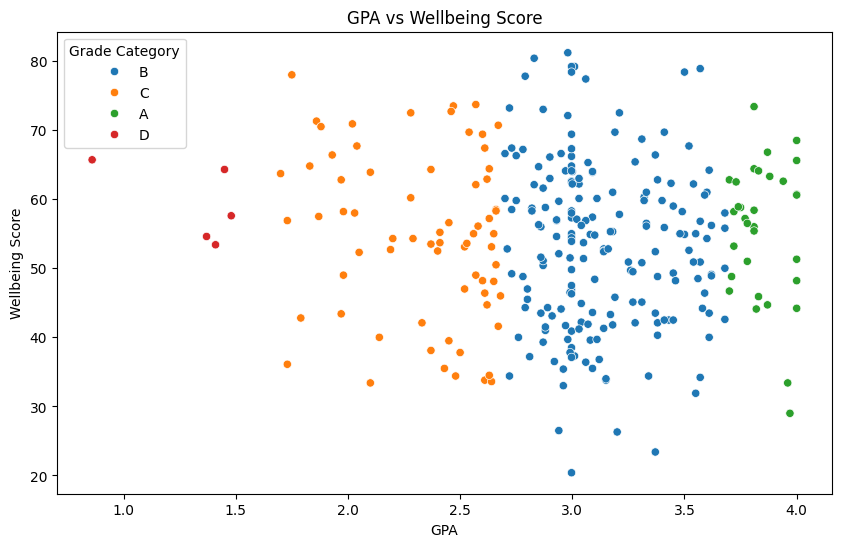

In [186]:
# Visualize relationship between GPA and Wellbeing Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='GPA', y='WellbeingScore', hue='GradeCategory')
plt.title('GPA vs Wellbeing Score')
plt.xlabel('GPA')
plt.ylabel('Wellbeing Score')
plt.legend(title='Grade Category')
plt.show();

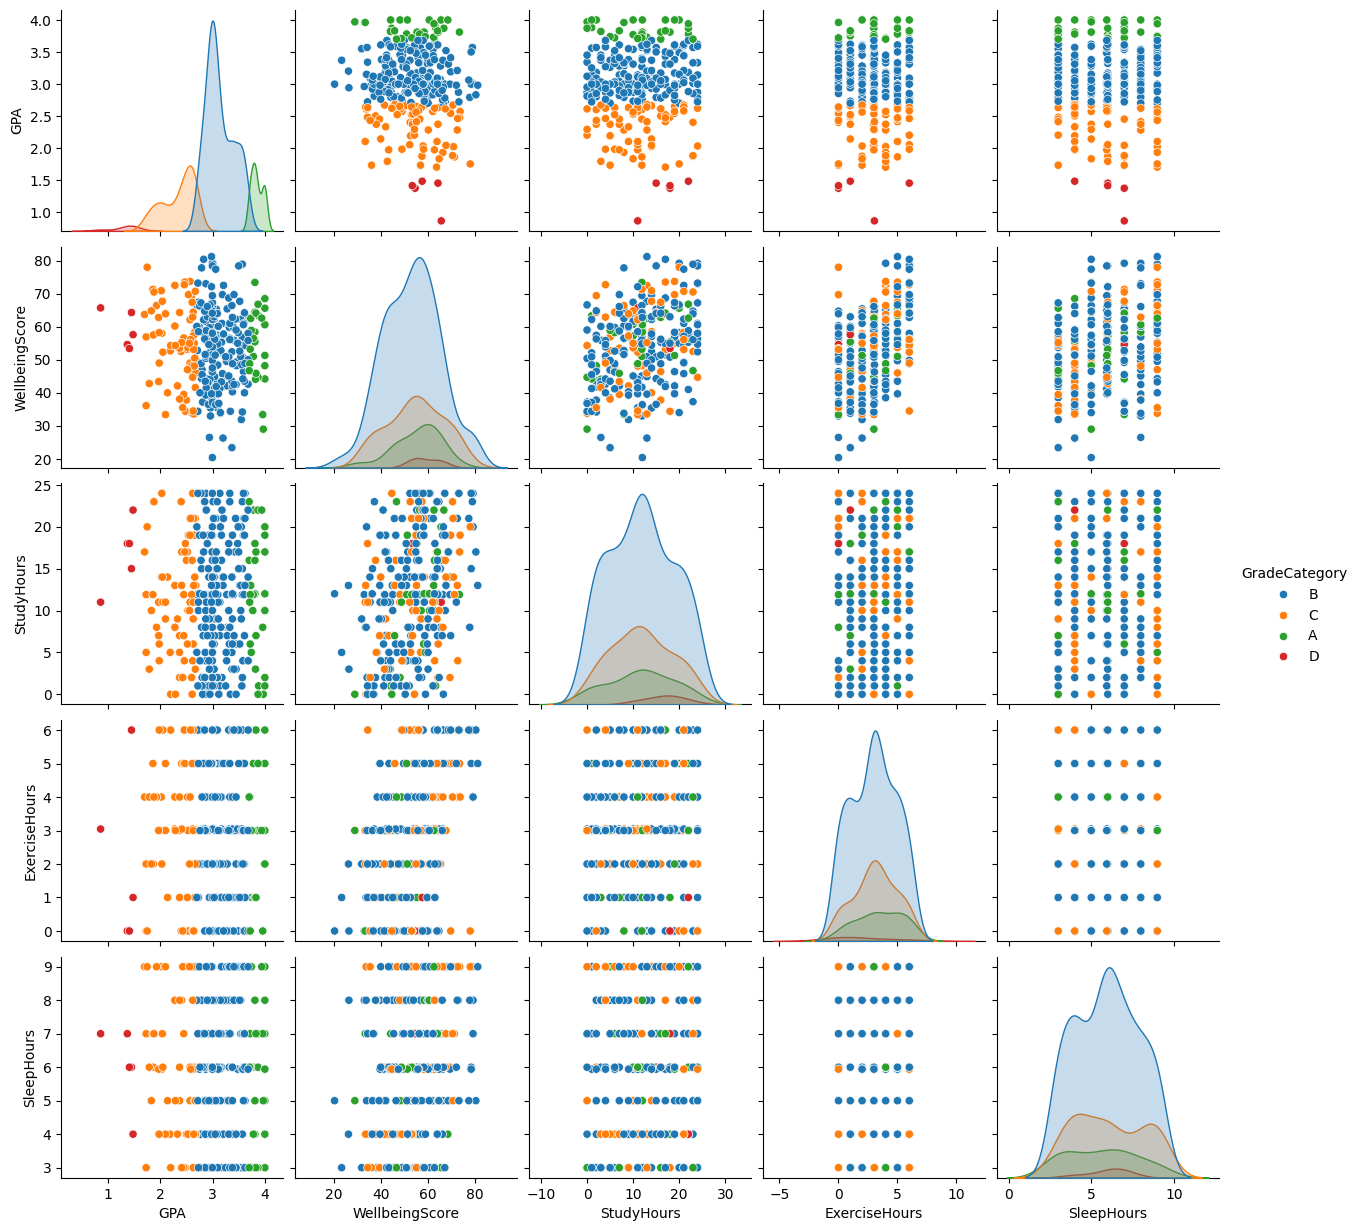

In [187]:
# Visualize relationship using pairplot
sns.pairplot(df1, hue='GradeCategory', vars=['GPA', 'WellbeingScore', 'StudyHours', 'ExerciseHours', 'SleepHours'])
plt.show();

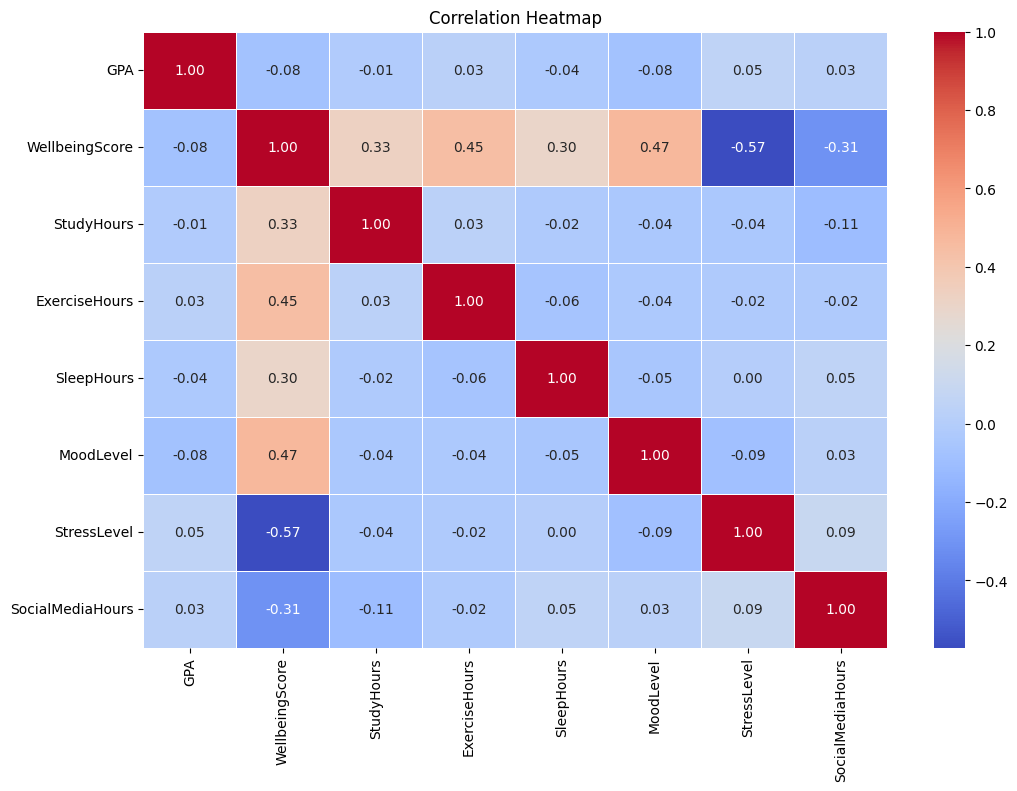

In [188]:
# Select numerical columns for correlation analysis
numerical_columns = ['GPA', 'WellbeingScore', 'StudyHours', 'ExerciseHours', 'SleepHours', 'MoodLevel', 'StressLevel', 'SocialMediaHours']
# Visualize Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df1[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

### <b>Conclusion</b>
There is a negative relationship between `WellbeingScore` and `GPA`, `StressLevel`, and `SocialMediaHours`. There is a small correlation between `WellbeingScore` and `StudyHours`, `ExerciseHours`, `SleepHours`, and `MoodLevel`.

# 

In [189]:
# Save the new dataframe to a new CSV file
df1.to_csv('student_wellbeing_final_cleaned.csv', index=False)